#  Population Estimates (1950–1980): Tidy data analysis.
This notebook analyzes population estimates from 1950 to 1980 using data from Wikipedia. The original dataset is in a wide format, with each year as a separate column. It has been reshaped into a tidy format to enable filtering, grouping, and visualization of population trends.

Step 1: Import pandas using sample data from the Wikipedia table, create wide format dataframe, and save in csv format.

In [2]:
>>> import pandas as pd
data = {
    'Country': ['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Australia'],
    '1950': [8151, 1228, 8893, 17161, 8273],
    '1960': [9830, 1624, 10910, 20687, 10276],
    '1970': [12431, 2402, 13932, 23999, 12507],
    '1980': [15045, 2672, 18807, 28115, 14692]
}
df_wide = pd.DataFrame(data)
df_wide.to_csv('population_estimates_wide.csv', index=False)
df_wide

,Country,1950,1960,1970,1980
0,Afghanistan,8151,9830,12431,15045
1,Albania,1228,1624,2402,2672
2,Algeria,8893,10910,13932,18807
3,Argentina,17161,20687,23999,28115
4,Australia,8273,10276,12507,14692


Data cleanup and transformation. The original dataset is in a wide format, with each year as a column, thus using pandas.melt() to reshape the data into a tidy format with three columns: Country, Year, and Population

Step 2: Melt the wide-format DataFrame into long format, and convert year to integer and population to thousands

In [3]:
>>> df_long = pd.melt(df_wide, id_vars='Country', var_name='Year', value_name='Population')
df_long['Year'] = df_long['Year'].astype(int)
df_long['Population'] = df_long['Population'] * 1000  # Convert from thousands to actual values

df_long.head()

,Country,Year,Population
0,Afghanistan,1950,8151000
1,Albania,1950,1228000
2,Algeria,1950,8893000
3,Argentina,1950,17161000
4,Australia,1950,8273000


Analysis: With a tidy dataset, it is possible to explore population trends over time by plotting population growth for selected countries, comparing populations in a specific year, and identifying countries with the highest growth between 1950 and 1980.

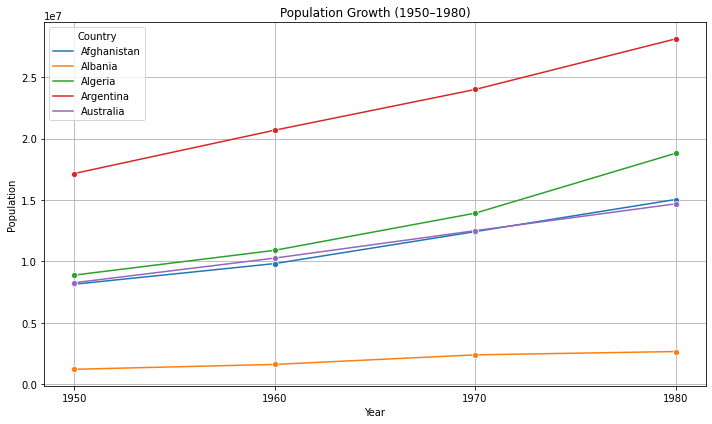

In [4]:
>>> import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='Year', y='Population', hue='Country', marker='o')
plt.title('Population Growth (1950–1980)')
plt.ylabel('Population')
plt.xticks([1950, 1960, 1970, 1980])
plt.grid(True)
plt.tight_layout()
plt.show()

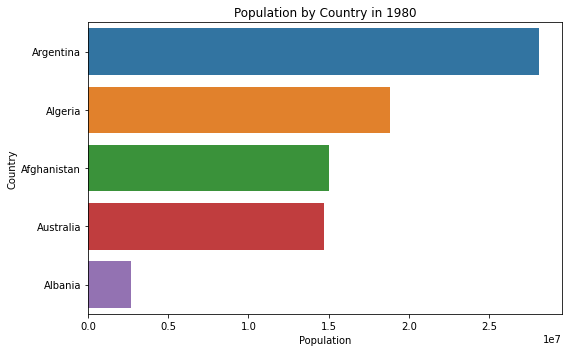

In [5]:
>>> pop_1980 = df_long[df_long['Year'] == 1980].sort_values(by='Population', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(data=pop_1980, x='Population', y='Country')
plt.title('Population by Country in 1980')
plt.xlabel('Population')
plt.tight_layout()
plt.show()

Growth Analysis (1950–1980): By calculating the percentage growth in the population between 1950 and 1980 for each country, and sorting by growth, reveals which countries experienced the most rapid demographic expansion during this period.

In [12]:
>>> df_pivot = df_long.pivot(index='Country', columns='Year', values='Population')
df_pivot.columns = df_pivot.columns.astype(str)
df_pivot['Growth (%)'] = ((df_pivot['1980'] - df_pivot['1950']) / df_pivot['1950']) * 100

In [13]:
df_pivot = df_pivot.reset_index()
df_pivot = df_pivot.sort_values(by='Growth (%)', ascending=False)
df_pivot[['Country', '1950', '1980', 'Growth (%)']]

Year,Country,1950,1980,Growth (%)
1,Albania,1228000,2672000,117.589577
2,Algeria,8893000,18807000,111.480940
0,Afghanistan,8151000,15045000,84.578579
4,Australia,8273000,14692000,77.589750
3,Argentina,17161000,28115000,63.830779


#Conclusion: 
By reshaping the dataset into a tidy format, it is possible to visualize population growth over time, compare country populations in a specific year and calculate percentage growth from 1950 to 1980. This transformation highlights how tidy data structures make analysis more flexible and powerful. Countries like Algeria and Afghanistan showed rapid growth, while others like Australia had more modest increases. This approach can be extended to larger datasets and longer timeframes for deeper demographic insights.
